In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
combine = [train_df, test_df]
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df2 = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

# Assess and explore the dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we found following features with relatively large number of missing values:
- PoolQC
- Fence
- MiscFeature
- Alley
- FireplaceQu

In [6]:
nulls = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


Reading through the description we found that NAN in certain columns means that they don't have the corresponding features.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


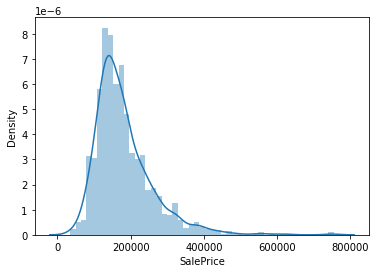

In [7]:
sns.distplot(train_df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

We need to transform the SalePrice since its not following normal distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.121335
Kurtosis: 0.809532


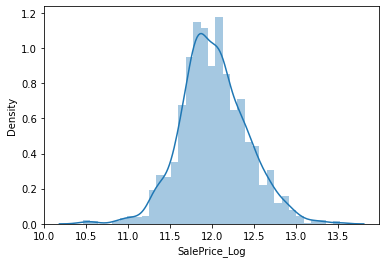

In [8]:
train_df['SalePrice_Log'] = np.log(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice_Log'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log'].kurt())
# dropping old column
train_df.drop('SalePrice', axis= 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


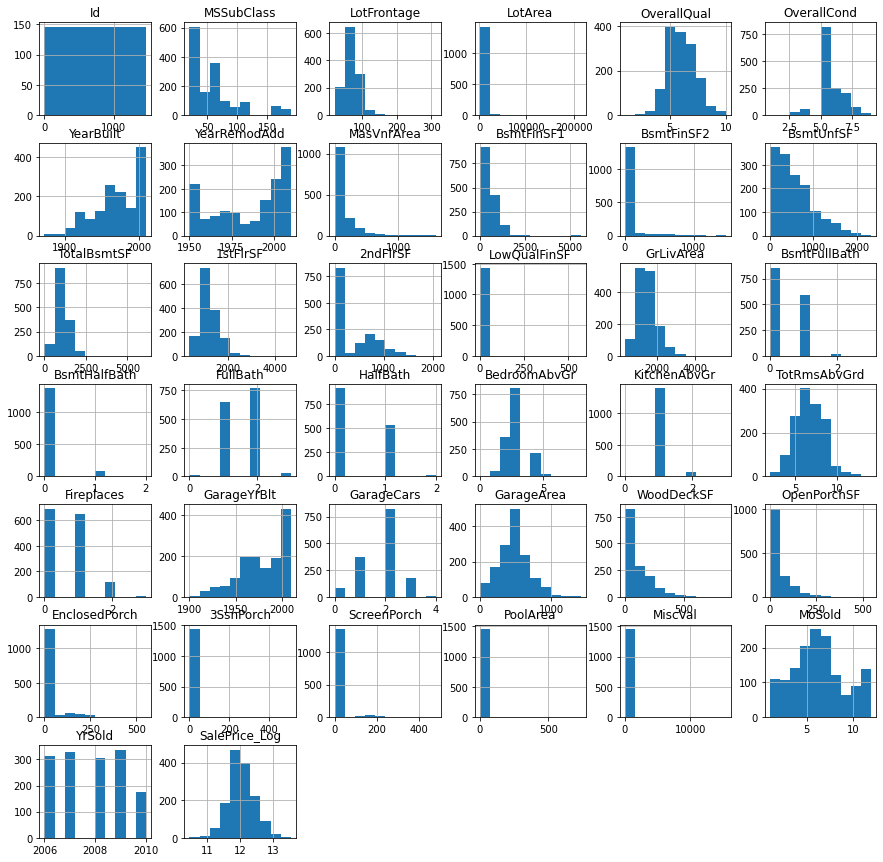

In [9]:
fig = train_df.hist(figsize=(15, 15))

In [10]:
categorical = []
numerical = []
for column in train_df:
    if train_df[column].dtypes == object:
        categorical.append(column)
    else:
        numerical.append(column)
len(categorical)

43

In [11]:
len(numerical)

38

In [12]:
numerical.remove('Id')

In [13]:
numerical.remove('SalePrice_Log')

In [14]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

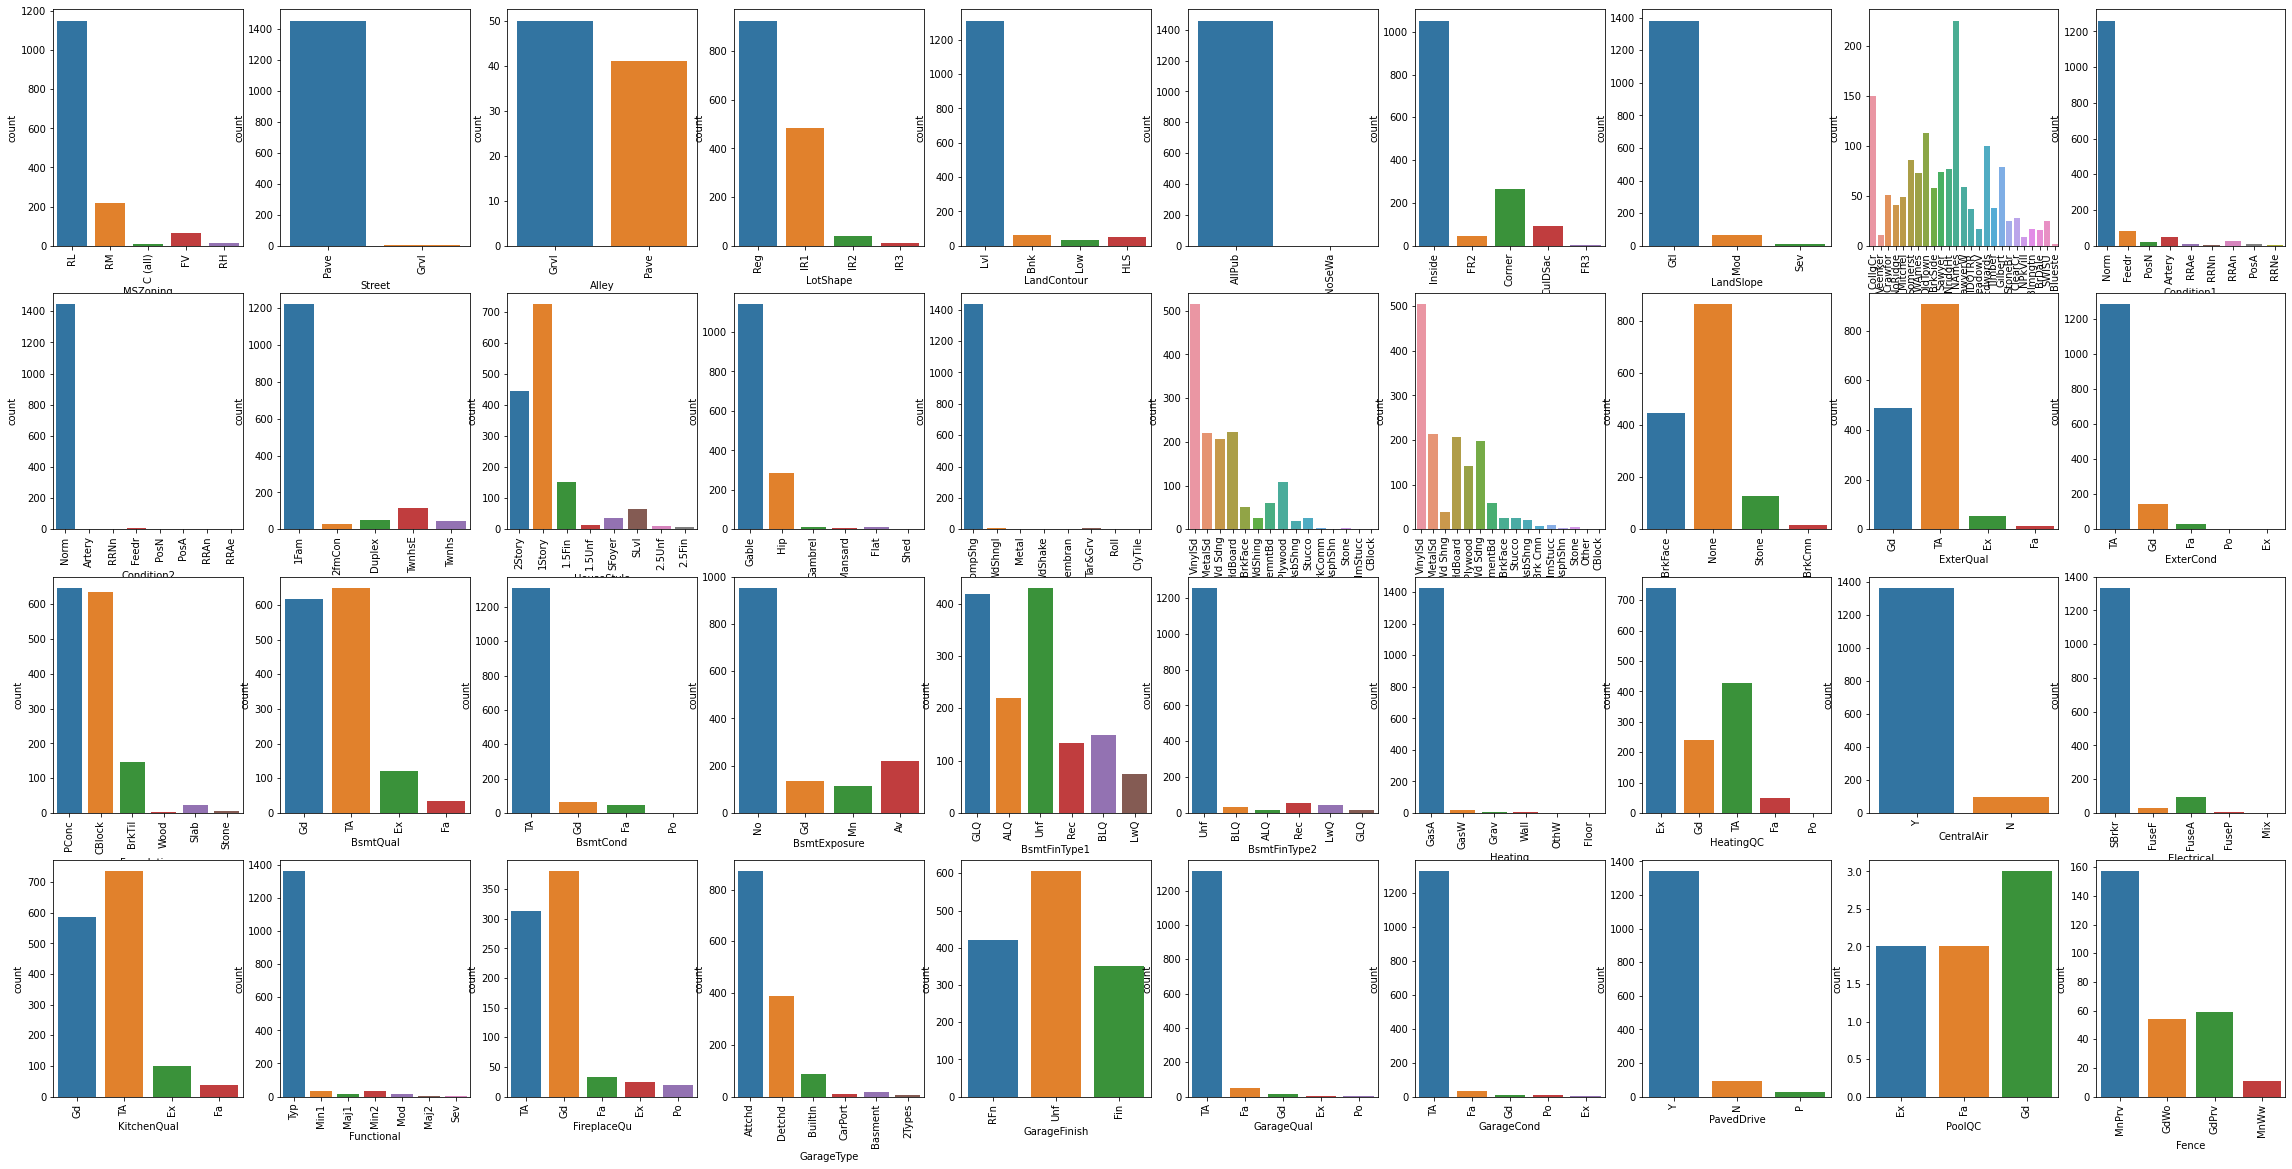

In [15]:
fig, ax = plt.subplots(4, 10, figsize=(40, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x = train_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Let's drop the following features for now as there aren't much variances in the dataset:
- Street
- Utilities
- Landslope
- Condition 2
- RoofMalt
- Heating



We can see that there are a few highly correlated pairs here:

- YearBuilt & GarageYrBlt
- TotalBsmtSF & 1stFlrSF
- GrLivArea & TotRmsAbvGrd
- GarageCars & GarageArea

Based on their correlation with SalePrice, let's drop the following features:
- GarageYrBlt
- 1stFlrSF
- TotRmsAbvGrd
- GarageArea

# Clean & Format Dataset

In [16]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train_df[col].fillna('None',inplace=True)
    test_df[col].fillna('None',inplace=True)

In [17]:
print(Diff(train_df, test_df))

['SalePrice_Log']


In [18]:
missing_values = train_df.columns[train_df.isnull().any()].tolist()

In [19]:
missing_values

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Handle columns with null vals:

In [20]:
missing_values2 = test_df.columns[test_df.isnull().any()].tolist()
missing_values2

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [21]:
missing_values = set(missing_values + missing_values2)
missing_values

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF'}

In [22]:
missing_values = set(missing_values)
missing_cat = []
missing_num = []
for i in missing_values:
    if i in categorical:
        missing_cat.append(i)
    else:
        missing_num.append(i)

In [23]:
missing_cat

[]

In [24]:
missing_num

['GarageCars',
 'BsmtFinSF2',
 'BsmtFullBath',
 'GarageArea',
 'GarageYrBlt',
 'BsmtUnfSF',
 'BsmtHalfBath',
 'MasVnrArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'LotFrontage']

Impute numerical columns with randomly generated numbers

In [25]:
for x in missing_num:
    mean = train_df[x].mean()
    std = train_df[x].std()
    is_null = train_df[x].isnull().sum()
    if is_null == 0:
        continue
    # compute random numbers between the mean, std and is_null
    if train_df[x].dtypes == float:
        rand_num = [np.random.uniform(mean - std,mean + std) for _ in range(is_null)]
    else:
        rand_num = np.random.randint(mean - std, mean + std, size = is_null)
    _slice = train_df[x].copy()
    _slice[np.isnan(_slice)] = rand_num
    train_df[x] = _slice
    train_df[x] = train_df[x].astype(train_df[x].dtypes)

In [26]:
for x in missing_num:
    #if x == 'TotalBsmtSF':
        #continue
    mean = test_df[x].mean()
    std = test_df[x].std()
    mean = float(mean)
    std = float(std)
    is_null = test_df[x].isnull().sum()
    if is_null == 0:
        continue

    if test_df[x].dtypes == float or mean-std + 1 >= mean + std:
        rand_num = [np.random.uniform(mean - std,mean + std) for _ in range(is_null)]
    else:
        rand_num = np.random.randint(mean - std, mean + std, size = is_null)
    # compute random numbers between the mean, std and is_null
    _slice = test_df[x].copy()
    _slice[np.isnan(_slice)] = rand_num
    test_df[x] = _slice
    test_df[x] = test_df[x].astype(test_df[x].dtypes)


In [27]:
##for dataset in combine:
  #  for x in missing_cat:
   #     is_null = dataset[x].isnull().sum()
    #    if is_null == 0:
     #       continue
      #      
       # dataset[x] = dataset[x].fillna(dataset[x].mode().iloc[0])


In [28]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [29]:
test_df.columns[test_df.isnull().any()]

Index([], dtype='object')

We need to check if the features are normally distributed

In [30]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
features = numerical + categorical

In [32]:
num_log_check = list(numerical)
num_log_check.append('SalePrice_Log')
for col in num_log_check:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_df[col].kurt())  
         )

MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 018.48
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.13
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.40
FullBath        Skewness: 00.04     Kurtosis: 

In [33]:
for df in [test_df,train_df]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)


In [34]:
print(Diff(test_df,train_df))

['SalePrice_Log']


In [35]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_Log', 'GrLivArea_Log', 'LotArea_Log'],
      dtype='object')

In [36]:
corr_check = list(numerical_feats)
corr=train_df[corr_check].corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log,GrLivArea_Log,LotArea_Log
Id,1.000000,0.011156,-0.003597,-0.028365,0.012609,-0.012713,-0.021998,-0.049774,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.000786,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942,0.004183,-0.017482
MSSubClass,0.011156,1.000000,-0.345153,0.032628,-0.059316,0.027850,0.040581,0.023105,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.078612,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959,0.081717,-0.462668
LotFrontage,-0.003597,-0.345153,1.000000,0.238952,-0.042383,0.116999,0.090040,0.173278,0.215569,0.047268,0.125290,0.367690,0.418503,0.076302,0.035206,0.098148,-0.007414,0.182292,0.055703,0.235693,0.004237,0.327232,0.239937,0.075061,0.266057,0.318364,0.084693,0.131137,0.020923,0.061010,0.038950,0.167266,0.023150,0.015256,0.007924,0.341596,0.342161,0.541900
OverallQual,-0.028365,0.032628,0.238952,1.000000,-0.091932,0.572323,0.550684,0.410937,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.513791,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184,0.614210,0.178215
OverallCond,0.012609,-0.059316,-0.042383,-0.091932,1.000000,-0.375983,0.073741,-0.126525,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.298104,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868,-0.101965,-0.006305
YearBuilt,-0.012713,0.027850,0.116999,0.572323,-0.375983,1.000000,0.592855,0.315705,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.766409,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570,0.235518,0.021937
YearRemodAdd,-0.021998,0.040581,0.090040,0.550684,0.073741,0.592855,1.000000,0.180144,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.607156,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608,0.311464,0.027670
MasVnrArea,-0.049774,0.023105,0.173278,0.410937,-0.126525,0.315705,0.180144,1.000000,0.262682,-0.072333,0.114234,0.361555,0.340513,0.174026,-0.069063,0.084283,0.026604,0.274677,0.201537,0.100951,-0.039670,0.278862,0.245806,0.246329,0.363979,0.372982,0.159323,0.125149,-0.111519,0.018761,0.061367,0.011703,-0.029820,-0.004644,-0.008164,0.429784,0.361886,0.122002
BsmtFinSF1,-0.005024,-0.069836,0.215569,0.239666,-0.046231,0.249503,0.128451,0.262682,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.143259,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023,0.163912,0.230969
BsmtFinSF2,-0.005968,-0.065649,0.047268,-0.059119,0.040229,-0.049107,-0.067759,-0.072333,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088369,-0.038264,-0.018227,0.067898,0.003093,0.036543,-

In [37]:
print (corr['SalePrice_Log'].sort_values(ascending=False)[:20], '\n')
print (corr['SalePrice_Log'].sort_values(ascending=False)[-5:])

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea_Log    0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.497982
Fireplaces       0.489449
MasVnrArea       0.429784
LotArea_Log      0.399918
BsmtFinSF1       0.372023
LotFrontage      0.341596
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
Name: SalePrice_Log, dtype: float64 

YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice_Log, dtype: float64


Outliers

In [38]:
train_df =  train_df .drop(
    train_df[(train_df ['OverallQual']==10) & (train_df ['SalePrice_Log']<12.3)].index)

In [39]:
train_df = train_df.drop(
    train_df[(train_df['GrLivArea_Log']>8.3) & (train_df['SalePrice_Log']<12.5)].index)

# Data Wrangling

Dropping all columns with weak correlation to SalePrice¶

In [40]:
min_val_corr = 0.4
target = 'SalePrice_Log'

corr = train_df.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [41]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.498362
Fireplaces       0.491998
MasVnrArea       0.433604
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.356885
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

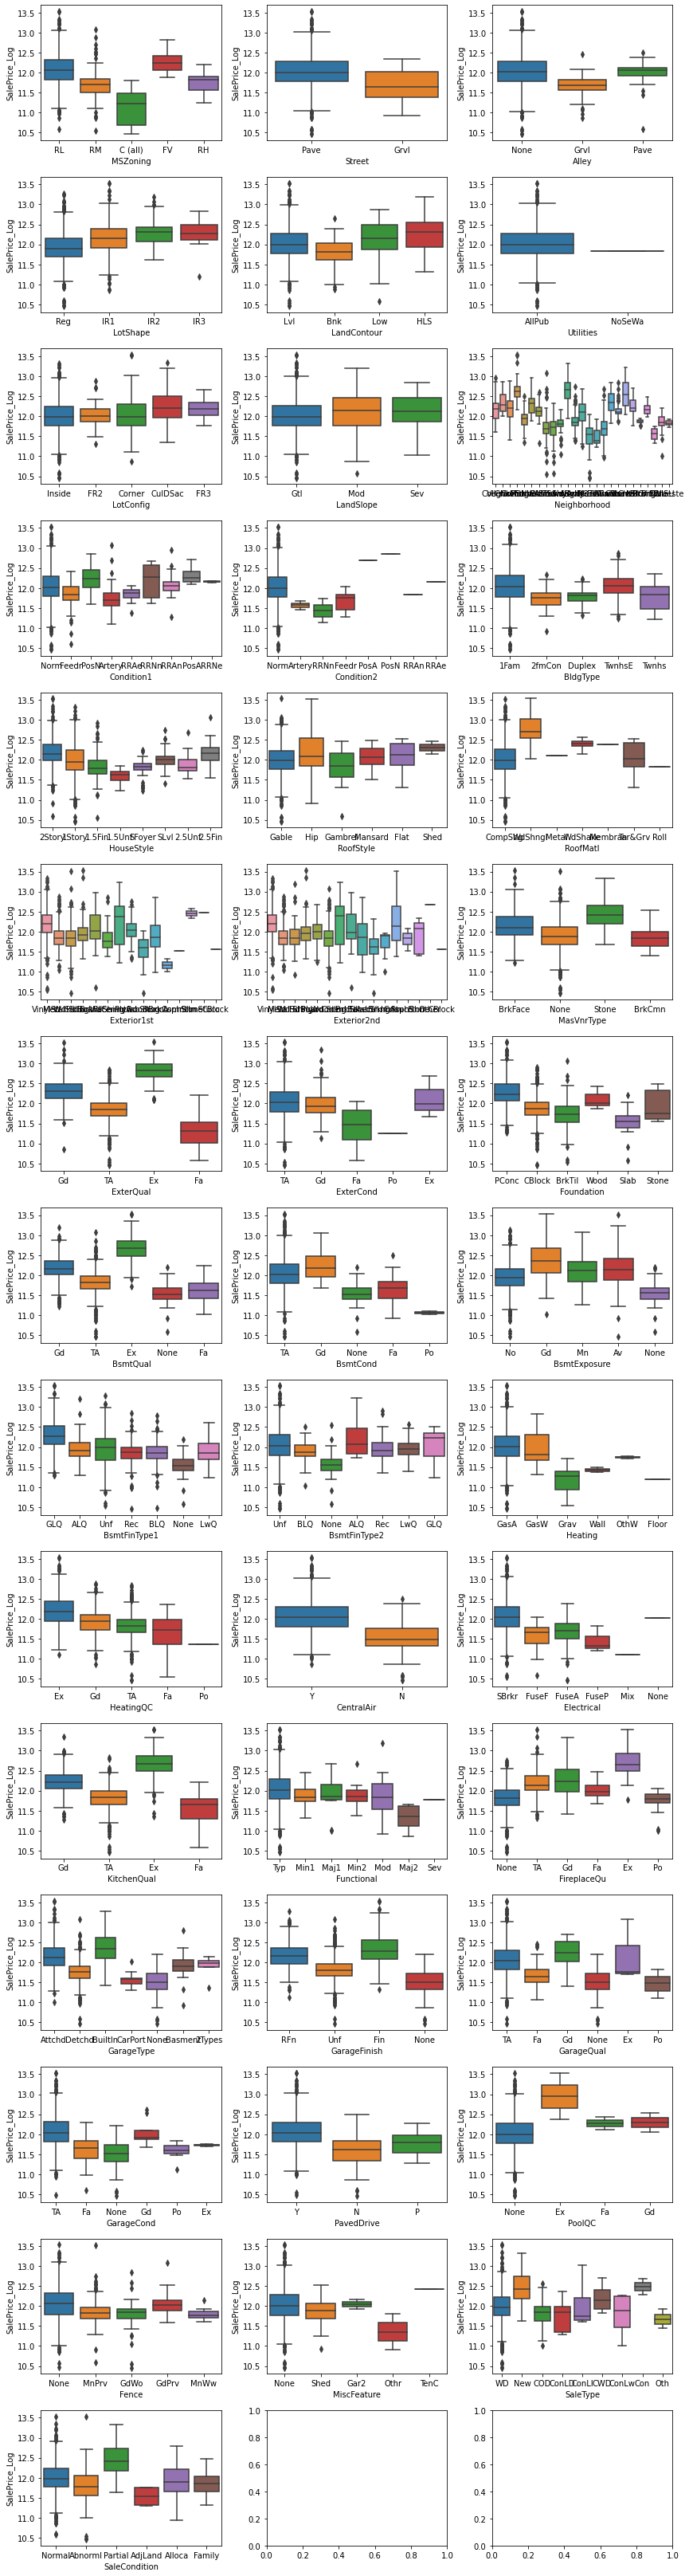

In [42]:
categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=train_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [43]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [44]:
to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

In [45]:
test_df.drop(cols_to_drop, inplace= True, axis = 1)

In [46]:
train_df.drop(cols_to_drop, inplace= True, axis = 1)

In [47]:
print(Diff(test_df,train_df))

['SalePrice_Log']


In [48]:
corr = train_df.corr()
corr_abs = corr.abs()

nr_all_cols = len(train_df)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.498362
Fireplaces       0.491998
MasVnrArea       0.433604
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64


In [49]:
categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
numerical_feats =  train_df.dtypes[train_df.dtypes != "object"].index

In [50]:
corr_check = list(numerical_feats)
corr=train_df[corr_check].corr()
corr.style.background_gradient(cmap='coolwarm')

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,LotArea_Log
OverallQual,1.000000,0.571368,0.549827,0.402529,0.538595,0.469092,0.548420,0.420621,0.392472,0.512472,0.600741,0.557230,0.821404,0.608878,0.167549
YearBuilt,0.571368,1.000000,0.592105,0.312871,0.400266,0.281253,0.467146,0.091220,0.144982,0.765948,0.537301,0.477998,0.587043,0.231791,0.016594
YearRemodAdd,0.549827,0.592105,1.000000,0.176244,0.294941,0.238769,0.437927,0.188418,0.109898,0.606435,0.419882,0.370000,0.565992,0.308980,0.022750
MasVnrArea,0.402529,0.312871,0.176244,1.000000,0.341184,0.318891,0.269362,0.267404,0.238002,0.242776,0.362880,0.362925,0.433604,0.349093,0.106727
TotalBsmtSF,0.538595,0.400266,0.294941,0.341184,1.000000,0.803830,0.327720,0.266146,0.327741,0.311269,0.451890,0.475069,0.647563,0.418780,0.333316
1stFlrSF,0.469092,0.281253,0.238769,0.318891,0.803830,1.000000,0.382120,0.396381,0.402517,0.223322,0.449195,0.477299,0.620500,0.539168,0.429789
FullBath,0.548420,0.467146,0.437927,0.269362,0.327720,0.382120,1.000000,0.553038,0.242375,0.463516,0.468198,0.404076,0.595899,0.652871,0.173787
TotRmsAbvGrd,0.420621,0.091220,0.188418,0.267404,0.266146,0.396381,0.553038,1.000000,0.320037,0.139529,0.361152,0.328714,0.537702,0.822960,0.350944
Fireplaces,0.392472,0.144982,0.109898,0.238002,0.327741,0.402517,0.242375,0.320037,1.000000,0.043375,0.301062,0.260455,0.491998,0.463949,0.321006
GarageYrBlt,0.512472,0.765948,0.606435,0.242776,0.311269,0.223322,0.463516,0.139529,0.043375,1.000000,0.471559,0.465559,0.498362,0.239450,-0.024223


In [51]:
corr = train_df.corr()
corr_abs = corr.abs()

nr_all_cols = len(train_df)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.498362
Fireplaces       0.491998
MasVnrArea       0.433604
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64


Going back to what we observed, here're the highly correlated pairs of features:
YearBuilt & GarageYrBlt
TotalBsmtSF & 1stFlrSF
GrLivArea & TotRmsAbvGrd
GarageCars & GarageArea

Gonna drop the ones with smaller correlation with target

In [52]:
cols_to_drop = ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] 
train_df.drop(cols_to_drop, inplace= True, axis = 1)

In [53]:
test_df.drop(cols_to_drop, inplace= True, axis = 1)

# Fit data into multillinear model

In [54]:
cat = []
num = []
for column in train_df:
    if train_df[column].dtypes == object:
        cat.append(column)
    else:
        num.append(column)

In [55]:
train_df = pd.get_dummies(train_df, columns=cat)

In [56]:
train_df = pd.get_dummies(train_df,drop_first=True)

In [57]:
test_df = pd.get_dummies(test_df, columns=cat)

In [58]:
test_df = pd.get_dummies(test_df,drop_first=True)

In [59]:
print(Diff(test_df,train_df))

['SaleType_None', 'KitchenQual_None', 'MSZoning_None', 'Condition2_RRAe', 'Condition2_RRNn', 'Condition2_RRAn', 'Electrical_Mix', 'Electrical_None', 'SalePrice_Log']


In [60]:
missing_in_test = ['MSZoning_None', 'SaleType_None', 'KitchenQual_None', 'Condition2_RRAn','Condition2_RRNn', 'Electrical_Mix', 'Electrical_None', 'Condition2_RRAe']

for x in missing_in_test:
    test_df[x] = 0

In [61]:
print(Diff(test_df,train_df))

['SaleType_None', 'KitchenQual_None', 'MSZoning_None', 'SalePrice_Log']


In [62]:
missing_in_test = ['SaleType_None', 'KitchenQual_None', 'MSZoning_None']

for x in missing_in_test:
    train_df[x] = 0

In [63]:
print(Diff(test_df,train_df))

['SalePrice_Log']


In [64]:
final_feat = train_df.columns

In [65]:
final_feat = final_feat.tolist()

In [66]:
final_feat.remove('SalePrice_Log')

In [67]:
#import statsmodels.api as sm;

#train_df['intercept'] = 1
#final_feat.append('intercept')

In [68]:
#lm = sm.OLS(train_df[target], train_df[final_feat])
#results = lm.fit()
#results.summary()

In [69]:
#final_feat.remove('intercept')

In [70]:
y = train_df[target]
X = train_df[final_feat]

In [71]:
X.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FullBath', 'Fireplaces', 'GarageCars', 'GrLivArea_Log', 'LotArea_Log',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition2_Artery',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condit

In [72]:
final_feat

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'GrLivArea_Log',
 'LotArea_Log',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_train_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [74]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

In [75]:
print ("R^2 is: \n", model.score(X_train_test, y_test))

R^2 is: 
 0.8858262550814157


In [76]:
y_pred = lr.predict(test_df)
y_pred[y_pred < 0] = y_pred.mean()


In [77]:
import numpy as np
y_pred_fin = np.exp(y_pred)

In [78]:
y_pred_fin

array([101277.74417018, 148502.75890957, 165165.32935591, ...,
       134411.53089147, 109041.64281579, 241412.21754568])

In [79]:
temp_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [80]:
output = pd.DataFrame({'Id': test_df2.Id, 'SalePrice': y_pred_fin})
output.to_csv('submission.csv', index=False)

In [81]:
output

,Id,SalePrice
0,1461,101277.744170
1,1462,148502.758910
2,1463,165165.329356
3,1464,187780.148882
4,1465,160780.553578
...,...,...
1454,2915,65369.572639
1455,2916,69022.327506
1456,2917,134411.530891
1457,2918,109041.642816
